# Exercise: 311 Requests

#### Summary

In NYC, you can call 311 with *anything* about the city - questions, complaints, etc. We'll be analyzing requests from 2015-2016 from the Department of Transportation and NYPD.

#### Data Source(s)

Filtered from full set, https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

#### Files

- `311-requests/311_Service_Requests_from_2010_to_Present.csv`, about 1.8 million rows (over 1GB of data)

#### Data dictionary

Visit [this page](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9#schema-preview) and click 'Show more' on the bottom right of the list (53 columns).

#### Skills

- Opening large files
- Time

## Opening the file

It's a big one! If your computer is slow or you only have 2GB of RAM, you might want to specify `nrows=50000` (or less). Increase the number until it takes around 20 seconds, maybe!

In [6]:
import pandas as pd
import numpy
%matplotlib inline
df = pd.read_csv("data/311_Service_Requests_from_2010_to_Present.csv", nrows=1000)

### Measuring time in Jupyter Notebooks

How long did that take? Read it in again, but this time **time how long it takes.** (and no, not with your watch - with Jupyter!)

In [7]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31463990,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10460.0,1110 WYATT STREET,WYATT STREET,DEVOE AVENUE,BRONX PARK AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,09/05/2015 06:55:25 AM,The Police Department responded and upon arriv...,09/05/2015 02:06:54 AM,06 BRONX,BRONX,1018201.0,245083.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.839306,-73.877301,"(40.83930620730105, -73.8773009180668)"
1,31463991,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,NaN,NaN,NaN,NaN,WEST 151 STREET,BROADWAY,INTERSECTION,NEW YORK,NaN,Precinct,Closed,09/04/2015 09:53:45 PM,The Police Department responded to the complai...,09/04/2015 06:37:24 PM,09 MANHATTAN,MANHATTAN,998728.0,241754.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.830222,-73.947684,"(40.830222460372724, -73.94768359377827)"
2,31463992,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,545 WEST 144 STREET,WEST 144 STREET,AMSTERDAM AVENUE,BROADWAY,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,09/05/2015 05:15:43 AM,The Police Department responded to the complai...,09/04/2015 10:32:02 PM,09 MANHATTAN,MANHATTAN,998263.0,239889.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.825104,-73.949368,"(40.825104318551325, -73.94936777115372)"
3,31463993,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11203.0,UTICA AVENUE,UTICA AVENUE,AVENUE D,FOSTER AVENUE,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Closed,09/05/2015 09:06:57 AM,The Police Department responded to the complai...,09/05/2015 02:26:44 AM,17 BROOKLYN,BROOKLYN,1003890.0,172805.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640965,-73.929232,"(40.64096464471428, -73.92923194083798)"
4,31463995,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,New York City Police Department,Illegal Parking,Overnight Commercial Storage,Street/Sidewalk,11210.0,GLENWOOD ROAD,GLENWOOD ROAD,BROOKLYN AVENUE,EAST 37 STREET,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Closed,09/04/2015 03:48:25 PM,The Police Department responded to the complai...,09/04/2015 05:21:19 PM,17 BROOKLYN,BROOKLYN,1000480.0,170405.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634384,-73.941525,"(40.63438406330588, -73.9415248319131)"


### Look at the first few rows

Make sure you can see **every single column.**

In [8]:
df.head(1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31463990,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10460.0,1110 WYATT STREET,WYATT STREET,DEVOE AVENUE,BRONX PARK AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,09/05/2015 06:55:25 AM,The Police Department responded and upon arriv...,09/05/2015 02:06:54 AM,06 BRONX,BRONX,1018201.0,245083.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.839306,-73.877301,"(40.83930620730105, -73.8773009180668)"


In [9]:
pd.set_option("display.max_columns", 100)

### Speeding things up

We're going to be looking at open and close times, agencies, and the complaints (both types and descriptor). The only kind of location-based thing we'll want is borough.

**How much faster is it if we only read in those columns?**

In [10]:
%%time
df = pd.read_csv("data/311_Service_Requests_from_2010_to_Present.csv", usecols=['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type', 'Descriptor', 'Location Type', 'Borough'])

Wall time: 52 s


## Converting the 'Created Date' and 'Closed Date' columns to datetimes

### First, testing some things out

Let's take a look at converting **Created Date**, but **not all at once**.

1. Take 10,000 of them and try to convert them **without** a format string. Time it.
2. Take the same 10,000 and try to convert them **with** a format string. Time it.

If you tried to do all 1.8 million rows, **how long might it take with a format string vs without?**

In [11]:
#pd.to_datetime(df['Created Date']).head(10000)

In [12]:
first_ten_thousand = df['Created Date'].head(10000)
pd.to_datetime(first_ten_thousand)

0      2015-09-04 22:55:25
1      2015-09-04 13:53:45
2      2015-09-04 21:15:43
3      2015-09-05 01:06:57
4      2015-09-04 07:48:25
5      2015-09-04 11:31:12
6      2015-09-04 07:02:24
7      2015-09-04 12:34:05
8      2015-09-04 19:56:42
9      2015-09-04 21:04:42
10     2015-09-04 20:26:09
11     2015-09-04 11:07:15
12     2015-09-04 22:23:59
13     2015-09-04 23:16:12
14     2015-09-04 16:49:55
15     2015-09-04 14:39:46
16     2015-09-04 20:21:22
17     2015-09-04 23:34:23
18     2015-09-04 21:55:19
19     2015-09-04 23:44:07
20     2015-09-04 08:12:10
21     2015-09-04 23:14:40
22     2015-09-04 20:17:20
23     2015-09-04 22:54:59
24     2015-09-04 15:45:14
25     2015-09-04 23:48:20
26     2015-09-05 01:53:40
27     2015-09-04 23:34:47
28     2015-09-04 23:37:52
29     2015-09-04 23:01:37
               ...        
9970   2015-09-07 13:39:12
9971   2015-09-07 06:53:28
9972   2015-09-07 06:10:00
9973   2015-09-07 04:02:27
9974   2015-09-07 09:00:33
9975   2015-09-07 07:13:20
9

In [13]:
%%time
pd.to_datetime(first_ten_thousand, format= '%m/%d/%Y %I:%M:%S %p')

Wall time: 356 ms


0      2015-09-04 22:55:25
1      2015-09-04 13:53:45
2      2015-09-04 21:15:43
3      2015-09-05 01:06:57
4      2015-09-04 07:48:25
5      2015-09-04 11:31:12
6      2015-09-04 07:02:24
7      2015-09-04 12:34:05
8      2015-09-04 19:56:42
9      2015-09-04 21:04:42
10     2015-09-04 20:26:09
11     2015-09-04 11:07:15
12     2015-09-04 22:23:59
13     2015-09-04 23:16:12
14     2015-09-04 16:49:55
15     2015-09-04 14:39:46
16     2015-09-04 20:21:22
17     2015-09-04 23:34:23
18     2015-09-04 21:55:19
19     2015-09-04 23:44:07
20     2015-09-04 08:12:10
21     2015-09-04 23:14:40
22     2015-09-04 20:17:20
23     2015-09-04 22:54:59
24     2015-09-04 15:45:14
25     2015-09-04 23:48:20
26     2015-09-05 01:53:40
27     2015-09-04 23:34:47
28     2015-09-04 23:37:52
29     2015-09-04 23:01:37
               ...        
9970   2015-09-07 13:39:12
9971   2015-09-07 06:53:28
9972   2015-09-07 06:10:00
9973   2015-09-07 04:02:27
9974   2015-09-07 09:00:33
9975   2015-09-07 07:13:20
9

### Creating new columns

Create new columns called `created_at` and `closed_at` from the `Created Date` and `Closed Date` columns. Do them individually, and **time them**.

In [14]:
df['created_at'] = pd.to_datetime(df['Created Date'], format= '%m/%d/%Y %I:%M:%S %p')

In [15]:
df['created_at'].head()

0   2015-09-04 22:55:25
1   2015-09-04 13:53:45
2   2015-09-04 21:15:43
3   2015-09-05 01:06:57
4   2015-09-04 07:48:25
Name: created_at, dtype: datetime64[ns]

In [16]:
df['closed_at'] = pd.to_datetime(df['Closed Date'], format= '%m/%d/%Y %I:%M:%S %p')

In [17]:
df['closed_at'].head()

0   2015-09-05 02:06:54
1   2015-09-04 18:37:24
2   2015-09-04 22:32:01
3   2015-09-05 02:26:43
4   2015-09-04 17:21:18
Name: closed_at, dtype: datetime64[ns]

### Confirming they look okay

Take a look at the first few rows to make sure the dates look correct, and then make sure their data type is `datetime64[ns]`.

# Examining agencies

Who has more 311 requests, the Department of Transportation or the NYPD?

In [18]:
df['Agency'].value_counts()

NYPD    1251121
DOT      593157
Name: Agency, dtype: int64

## What's the difference between "Complaint Type" and "Descriptor" columns?

In [19]:
df['Complaint Type'].value_counts()  #Categories

Noise - Residential            429932
Blocked Driveway               219927
Illegal Parking                215158
Street Condition               215053
Street Light Condition         187228
Noise - Street/Sidewalk        112890
Noise - Commercial              93115
Traffic Signal Condition        79737
Derelict Vehicle                50758
Broken Muni Meter               47234
Noise - Vehicle                 43213
Animal Abuse                    20609
Non-Emergency Police Matter     16716
Street Sign - Damaged           12041
Sidewalk Condition              11630
Traffic                         10825
Highway Condition               10795
Homeless Encampment             10053
Street Sign - Missing            9061
Vending                          8894
Noise - Park                     7995
DOT Literature Request           6028
Curb Condition                   4381
Street Sign - Dangling           4015
Drinking                         2942
Noise - House of Worship         1991
Posting Adve

In [20]:
df['Descriptor'].value_counts() #descriptions

Loud Music/Party                                             432588
No Access                                                    163622
Street Light Out                                             147587
Pothole                                                      138134
Banging/Pounding                                             122237
Loud Talking                                                  78513
Posted Parking Sign Violation                                 62033
Partial Access                                                56305
Blocked Hydrant                                               50785
With License Plate                                            50758
Controller                                                    41109
Blocked Sidewalk                                              32649
Commercial Overnight Parking                                  31242
Car/Truck Music                                               26665
Cave-in                                         

## What are the most popular categories of complaints for the NYPD? For the DOT?

In [21]:
df[df['Agency'] == 'NYPD']['Complaint Type'].value_counts().head()

Noise - Residential        429932
Blocked Driveway           219927
Illegal Parking            215158
Noise - Street/Sidewalk    112890
Noise - Commercial          93115
Name: Complaint Type, dtype: int64

In [22]:
df[df['Agency'] == 'DOT']['Complaint Type'].value_counts().head()

Street Condition            215052
Street Light Condition      187228
Traffic Signal Condition     79737
Broken Muni Meter            47234
Street Sign - Damaged        12041
Name: Complaint Type, dtype: int64

## When people are complaining about street conditions, what are they usually complaining about?

In [23]:
df[df['Complaint Type'] == 'Street Condition']['Descriptor']

39                                Pothole
69                                Pothole
75                                Pothole
76                                Pothole
100                               Pothole
138                               Pothole
147                               Pothole
157        Rough, Pitted or Cracked Roads
160        Rough, Pitted or Cracked Roads
163                               Cave-in
164                               Cave-in
165                               Cave-in
166                  Line/Marking - Faded
172                               Cave-in
207                Blocked - Construction
212               Plate Condition - Noisy
220                  Failed Street Repair
222               Plate Condition - Noisy
223                       Unsafe Worksite
281                               Pothole
304                               Pothole
330                               Pothole
399                               Pothole
400                               

## What kinds of noise are they complaining about when making residential noise complaints?

In [24]:
df[df['Complaint Type'] == 'Noise - Residential']['Descriptor'].value_counts()

Loud Music/Party    283631
Banging/Pounding    108470
Loud Talking         30097
Loud Television       7734
Name: Descriptor, dtype: int64

# Timing our complaints

How many complaints were filed each month?

- Tip: You'll probably want to `.set_index` first!

In [25]:
df.set_index('created_at', inplace= True)

## Plot how many requests were filed each month

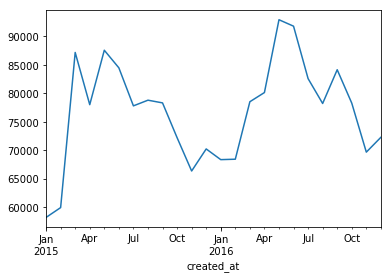

In [26]:
df['Unique Key'].resample('M').count().plot()

# Hmmm, it looks like a cycle

What could cause that? Try a couple comparisons to see if you can find out.

- Tip: Maybe the most popular summer complaints vs winter
- Tip: Maybe graphing the different agencies on the same graph

If you don't figure it out **that's okay!** 

In [27]:
summer = df[df.index.month.isin([6, 7, 8])]

In [28]:
winter = df[df.index.month.isin([12, 1, 2])]

In [29]:
import numpy as np
import datetime as datetime

In [30]:
df["2015-06":"2015-08"]['Complaint Type'].value_counts().head(5)

Noise - Residential       56003
Street Condition          29377
Illegal Parking           24891
Street Light Condition    24651
Blocked Driveway          24011
Name: Complaint Type, dtype: int64

In [31]:
df["2015-01":"2015-03"]['Complaint Type'].value_counts().head(5)

Noise - Residential       43615
Street Condition          42728
Blocked Driveway          24557
Street Light Condition    22831
Illegal Parking           18068
Name: Complaint Type, dtype: int64

In [32]:
df['Complaint Type'].groupby(by=df.index.month).value_counts()

created_at  Complaint Type             
1           Noise - Residential            31317
            Blocked Driveway               17359
            Street Light Condition         14772
            Illegal Parking                14179
            Street Condition               13597
            Traffic Signal Condition        8192
            Noise - Commercial              6408
            Broken Muni Meter               4235
            Derelict Vehicle                3094
            Noise - Street/Sidewalk         2507
            Animal Abuse                    2147
            Noise - Vehicle                 1511
            Non-Emergency Police Matter      939
            Street Sign - Damaged            800
            DOT Literature Request           715
            Highway Condition                654
            Sidewalk Condition               648
            Street Sign - Missing            615
            Traffic                          517
            Vending          

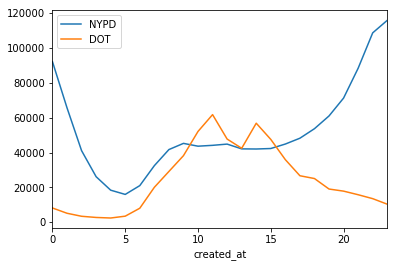

In [34]:
nypd = df[df['Agency'] == 'NYPD']
dot = df[df['Agency'] == 'DOT']


ax = nypd.groupby(by=nypd.index.hour).count().plot(y='Unique Key', label='NYPD')
dot.groupby(by=dot.index.hour).count().plot(y='Unique Key', label='DOT', ax=ax)

## Time of day

### What time of day do people complain?

In [35]:
df['Unique Key'].groupby(by=df.index.hour).count().sort_values(ascending = False).head(1)

created_at
23    126255
Name: Unique Key, dtype: int64

### What time of day do people complain about potholes?

In [36]:
potholes = df[df['Descriptor'] == 'Pothole']

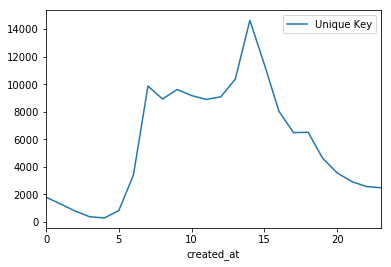

In [37]:
potholes.groupby(by= potholes.index.hour).count().plot(y='Unique Key')

### What time of day do people complain about loud parties?

In [38]:
parties = df[df['Descriptor'] == 'Loud Music/Party']


In [39]:
parties['Unique Key'].groupby(by= parties.index.hour).count().head(1)

created_at
0    53682
Name: Unique Key, dtype: int64

## Days of the week

### What days of the week do people complain about potholes?

DatetimeIndex.dayofweek
The day of the week with Monday=0, Sunday=6

In [40]:
potholes['Unique Key'].groupby(by= potholes.index.dayofweek).count().sort_values(ascending = False).head(1)

created_at
1    25260
Name: Unique Key, dtype: int64

### What days of the week do people complain about loud parties?

In [41]:
parties['Unique Key'].groupby(by= parties.index.dayofweek).count().sort_values(ascending = False).head(1)

created_at
6    118467
Name: Unique Key, dtype: int64

### What do you think is the best kind of graph for describing day of the week complaints?

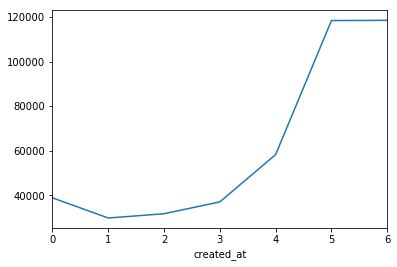

In [42]:
parties['Unique Key'].groupby(by= parties.index.dayofweek).count().plot()

# Some more investigation

## Are there more homeless people in the city in the summer or in the winter?

In [68]:
summer[summer['Complaint Type'] == 'Homeless Encampment']['Unique Key'].count()

3663

In [67]:
winter[winter['Complaint Type'] == 'Homeless Encampment']['Unique Key'].count()

1298

## What holiday(s) are most popular for illegal fireworks?

In [46]:
Fireworks = df[df['Complaint Type'] == 'Illegal Fireworks']

In [47]:
Fireworks['Complaint Type'].groupby(by= Fireworks.index.date).count().sort_values(ascending= False).head(1)

2015-07-04    24
Name: Complaint Type, dtype: int64

## Plot all kinds of noise complaints on top of each other

In [48]:
noise = df[df["Complaint Type"].str.contains("Noise")]
noise["Complaint Type"].value_counts()

Noise - Residential         429932
Noise - Street/Sidewalk     112890
Noise - Commercial           93115
Noise - Vehicle              43213
Noise - Park                  7995
Noise - House of Worship      1991
Name: Complaint Type, dtype: int64

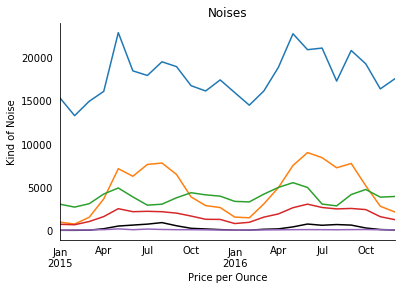

In [72]:
res = df[df['Complaint Type'] == 'Noise - Residential']
walk = df[df['Complaint Type'] == 'Noise - Street/Sidewalk']
com = df[df['Complaint Type'] == 'Noise - Commercial']
veh = df[df['Complaint Type'] == 'Noise - Vehicle']
park = df[df['Complaint Type'] == 'Noise - Park']
church = df[df['Complaint Type'] == 'Noise - House of Worship']


ax = res['Unique Key'].resample('M').count().plot()
walk['Unique Key'].resample('M').count().plot(ax=ax)
com['Unique Key'].resample('M').count().plot(ax=ax)
veh['Unique Key'].resample('M').count().plot(ax=ax)
park['Unique Key'].resample('M').count().plot(color='black', ax=ax)
church['Unique Key'].resample('M').count().plot(ax=ax)

ax.set_title("Noises")
ax.set_xlabel('Price per Ounce')
ax.set_ylabel('Kind of Noise')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')